In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Weather_data.csv", parse_dates=["timestamp"], index_col="timestamp")
df.head(5)

,Unnamed: 0,tempSHT,hum,IR,Full,Visible,Lux,eCO2,TVOC,tempCCS,Pressure,altm,tempMPL
timestamp,,,,,,,,,,,,,
2019-11-16 03:50:54,0,27.61,62.08,40,117,77,103.38,508,16,34.57,29.83,48.50,26.75
2019-11-16 12:08:12,1,26.75,59.69,42,124,82,110.62,452,7,33.29,29.83,48.56,26.00
2019-11-16 12:09:13,2,26.56,59.56,42,124,82,110.62,459,8,32.67,29.83,48.63,25.81
2019-11-16 12:10:14,3,26.41,59.15,43,126,83,111.54,476,11,32.67,29.83,48.25,25.69
2019-11-16 12:11:15,4,26.47,61.38,43,127,84,113.34,497,14,32.67,29.83,48.19,25.69


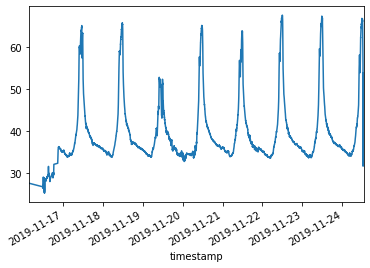

In [3]:
df.tempSHT.plot()

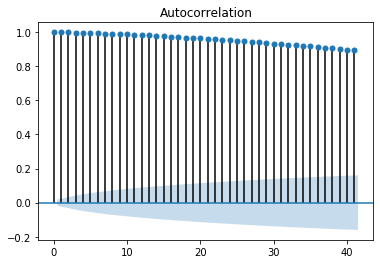

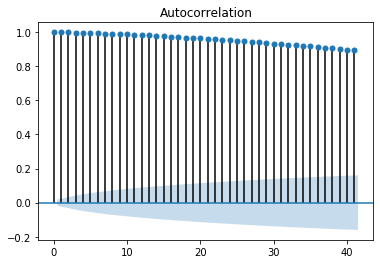

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.tempSHT)

### Converting series to stationary

In [5]:
df_diff = df.tempSHT.diff(periods=1)

In [6]:
df_diff = df_diff[1:]
df_diff.head()

timestamp
2019-11-16 12:08:12   -0.86
2019-11-16 12:09:13   -0.19
2019-11-16 12:10:14   -0.15
2019-11-16 12:11:15    0.06
2019-11-16 12:12:16    0.13
Name: tempSHT, dtype: float64

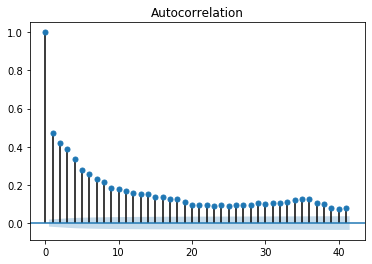

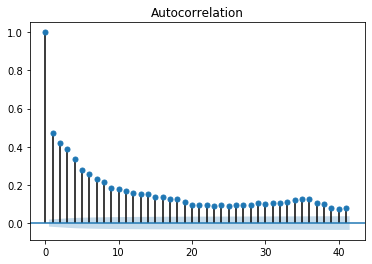

In [7]:
plot_acf(df_diff)

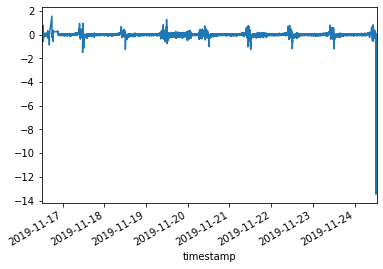

In [8]:
df_diff.plot()

In [17]:
X = df.tempSHT.values
train = X[0:10000] # 27 data as train data
test = X[9000:]  # 9 data as test data
predictions = []

In [18]:
train.size

10000

### Autoreggresive AR Model

In [19]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [21]:
predictions = model_ar_fit.predict(start=500,end=9000)

In [22]:
test

array([35.3 , 35.29, 35.26, ..., 32.93, 32.21, 31.68])

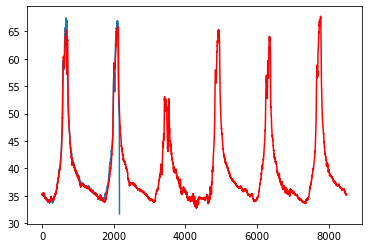

In [23]:
plt.plot(test)
plt.plot(predictions,color='red')

### ARIMA Model

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-18406.737562779515


In [26]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([38.6441046 , 38.61276076, 38.5814851 , 38.55616059, 38.53285479,
       38.51048614, 38.48712911, 38.46570565, 38.44161861, 38.41690584])

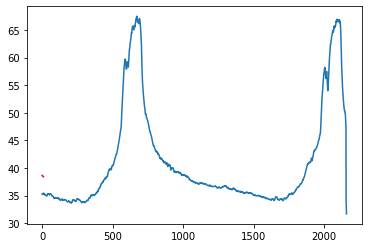

In [27]:
plt.plot(test)
plt.plot(predictions,color='red')